In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os

files = os.listdir('.')
files

['mem_len=32 output_len=1000 batch_size=8.txt',
 'plot-GPU-utilization.ipynb',
 'mem_len=32 output_len=1000 batch_size=16.txt',
 'mem_len=64 output_len=1000 batch_size=16.txt',
 '.ipynb_checkpoints',
 'mem_len=32 output_len=1000 batch_size=4.txt']

46.28881640625
[1295633408, 1314462720, 1333986304, 1354193408, 1373985792, 1393290752, 1413834752, 1431869440, 1452811264, 1471313920, 1490179584, 1509704192, 1529874432, 1548752384, 1569046528, 1588958720, 1607325184, 1626882048, 1646994432, 1665897472, 1685422080, 1706300416, 1724723712, 1744911360, 1764115456, 1783468544, 1802746368, 1822675456, 1841615360, 1861138944, 1881235456, 1900187136, 1919711744, 1939795968, 1958759424, 1978284032, 1998356480, 2017332224, 2036856320, 2056916480, 2075905024, 2095429120, 2116443136, 2135198208, 2154477056, 2174036992, 2193049600, 2212573696, 2232597504, 2251622400, 2271145984, 2291157504, 2310195200, 2329718784, 2349717504, 2368766976, 2388291584, 2408278016, 2427339264, 2446863872, 2466838528, 2485912064, 2505436160, 2525398528, 2544484864, 2564008960, 2583958528, 2603057152, 2622581760, 2642519040, 2661629440, 2681153536, 2701079552, 2720202240, 2739725824, 2759639552, 2778775040, 2798298624, 2818199552, 2837346816, 2856871424, 2876760064, 

Text(0.5, 1.0, 'plot')

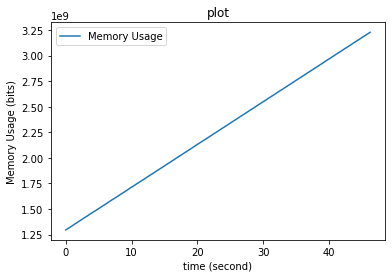

In [49]:
file = Path.cwd() / 'mem_len=32 output_len=1000 batch_size=8.txt'
with open(file, 'r') as text:
    textfile = text.read()
#     print(textfile)
runtime = float(textfile.split("\n")[0])
memory = textfile.split("\n")[1].split(",")
memory[0] = memory[0][1:]
memory[-1] = memory[-1][:-1]
memory = [int(mem) for mem in memory]
t = np.linspace(start=0, stop=runtime, num=len(memory)).tolist()
print(runtime)
print(memory)
print(t)
plt.figure()
plt.plot(t, memory, label='Memory Usage')
# plt.ylim(0, 100)
plt.xlabel("time (second)")
plt.ylabel("Memory Usage (bits)")
plt.legend()
plt.title("plot")


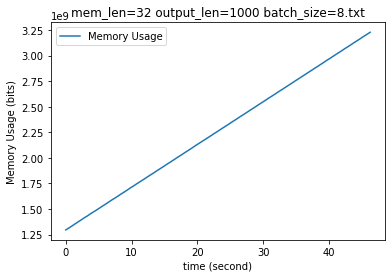

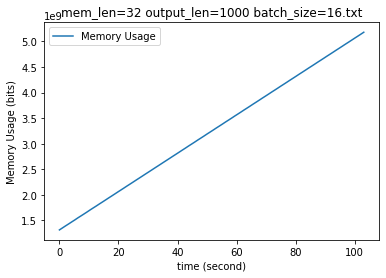

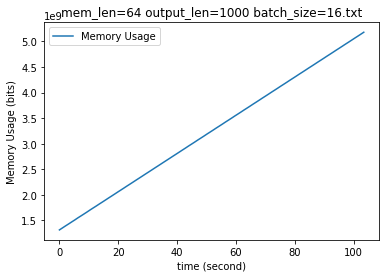

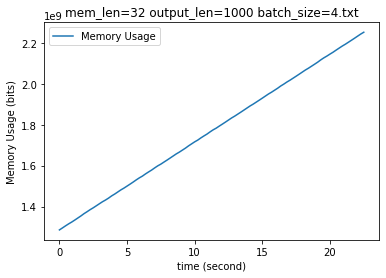

In [50]:
for fileName in files:
    if fileName[-1] != "t": continue
    file = Path.cwd() / fileName
    with open(file, 'r') as text:
        textfile = text.read()
#     print(textfile)
    runtime = float(textfile.split("\n")[0])
    memory = textfile.split("\n")[1].split(",")
    memory[0] = memory[0][1:]
    memory[-1] = memory[-1][:-1]
    memory = [int(mem) for mem in memory]
    t = np.linspace(start=0, stop=runtime, num=len(memory)).tolist()
    plt.figure()
    plt.plot(t, memory, label='Memory Usage')
    # plt.ylim(0, 100)
    plt.xlabel("time (second)")
    plt.ylabel("Memory Usage (bits)")
    plt.legend()
    plt.title(fileName)